In [2]:
# ELECTRICAL ASSET INTELLIGENCE PLATFORM
# 01: Data Exploration Notebook
# SPE AI/ML Boot Camp Final Project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set style for consistent visualizations
# Use a valid matplotlib style name
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# Create results directory if it doesn't exist
if not os.path.exists('../results'):
    os.makedirs('../results')

In [4]:
# Load all datasets
print("Loading electrical asset datasets...")

transformer_df = pd.read_csv('../data/transformer_data.csv')
motor_df = pd.read_csv('../data/motor_data.csv')
capacitor_df = pd.read_csv('../data/capacitor_data.csv')
ups_df = pd.read_csv('../data/ups_data.csv')

print(f"Transformer data shape: {transformer_df.shape}")
print(f"Motor data shape: {motor_df.shape}")
print(f"Capacitor bank data shape: {capacitor_df.shape}")
print(f"UPS data shape: {ups_df.shape}")

Loading electrical asset datasets...
Transformer data shape: (1000, 10)
Motor data shape: (1000, 10)
Capacitor bank data shape: (1000, 10)
UPS data shape: (1000, 9)


In [5]:
# Convert date columns to datetime objects
transformer_df['date'] = pd.to_datetime(transformer_df['date'])
motor_df['date'] = pd.to_datetime(motor_df['date'])
capacitor_df['date'] = pd.to_datetime(capacitor_df['date'])
ups_df['date'] = pd.to_datetime(ups_df['date'])

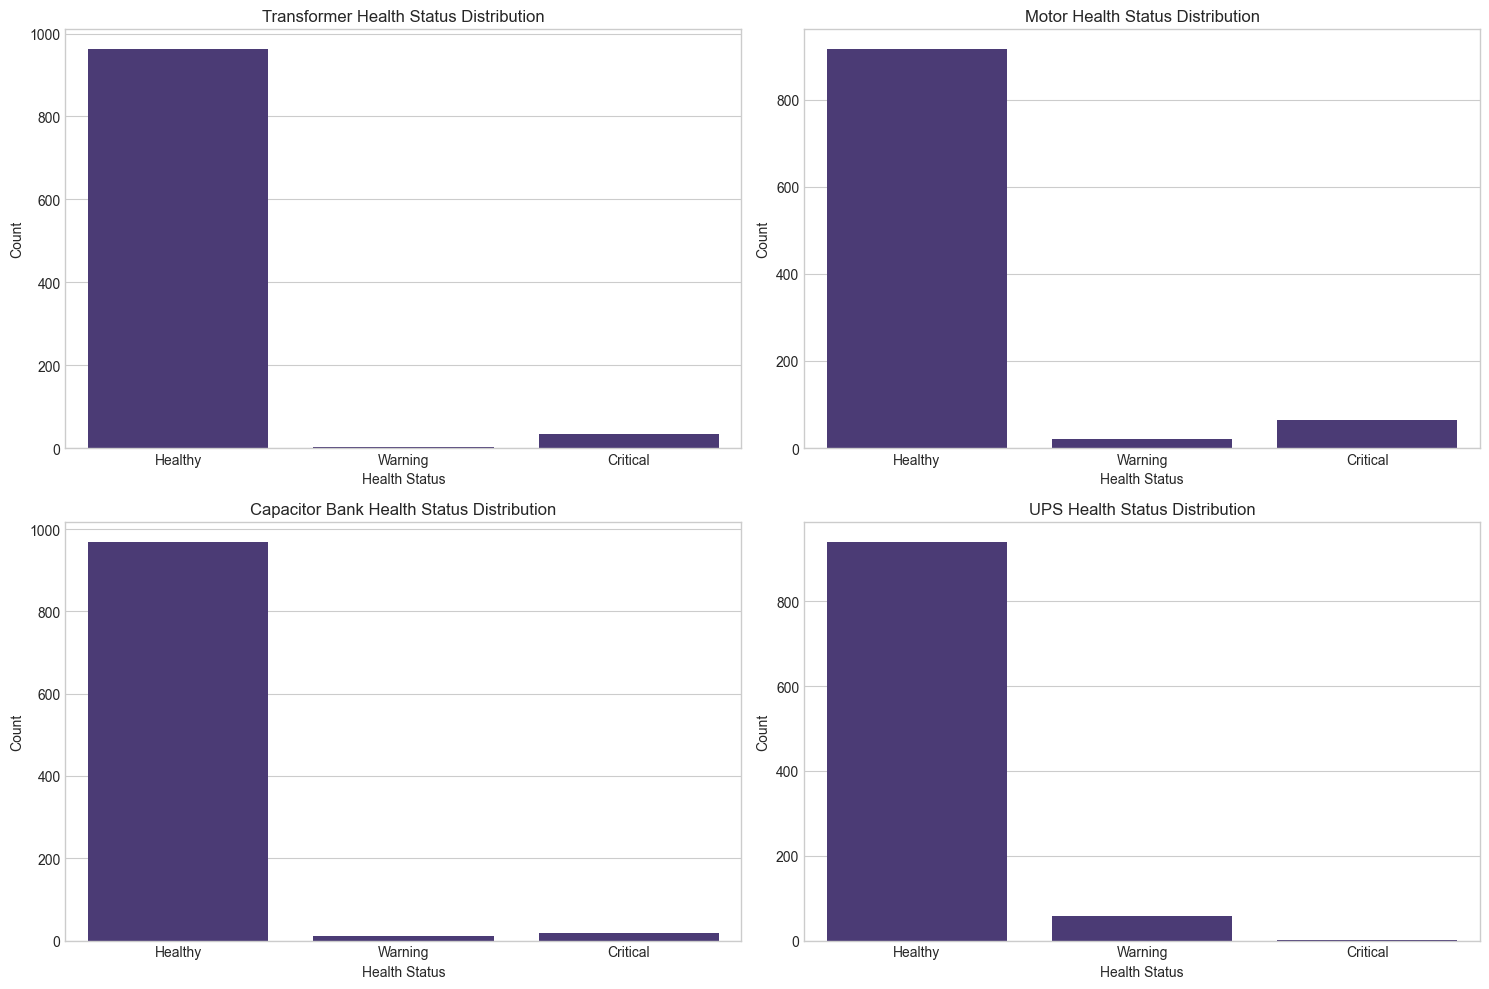

In [6]:
# 1. Health Status Distribution
plt.figure(figsize=(15, 10))

# Transformer
plt.subplot(2, 2, 1)
sns.countplot(x='health_status', data=transformer_df)
plt.title('Transformer Health Status Distribution')
plt.xlabel('Health Status')
plt.ylabel('Count')

# Motor
plt.subplot(2, 2, 2)
sns.countplot(x='health_status', data=motor_df)
plt.title('Motor Health Status Distribution')
plt.xlabel('Health Status')
plt.ylabel('Count')

# Capacitor Bank
plt.subplot(2, 2, 3)
sns.countplot(x='health_status', data=capacitor_df)
plt.title('Capacitor Bank Health Status Distribution')
plt.xlabel('Health Status')
plt.ylabel('Count')

# UPS
plt.subplot(2, 2, 4)
sns.countplot(x='health_status', data=ups_df)
plt.title('UPS Health Status Distribution')
plt.xlabel('Health Status')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig('../results/health_status_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

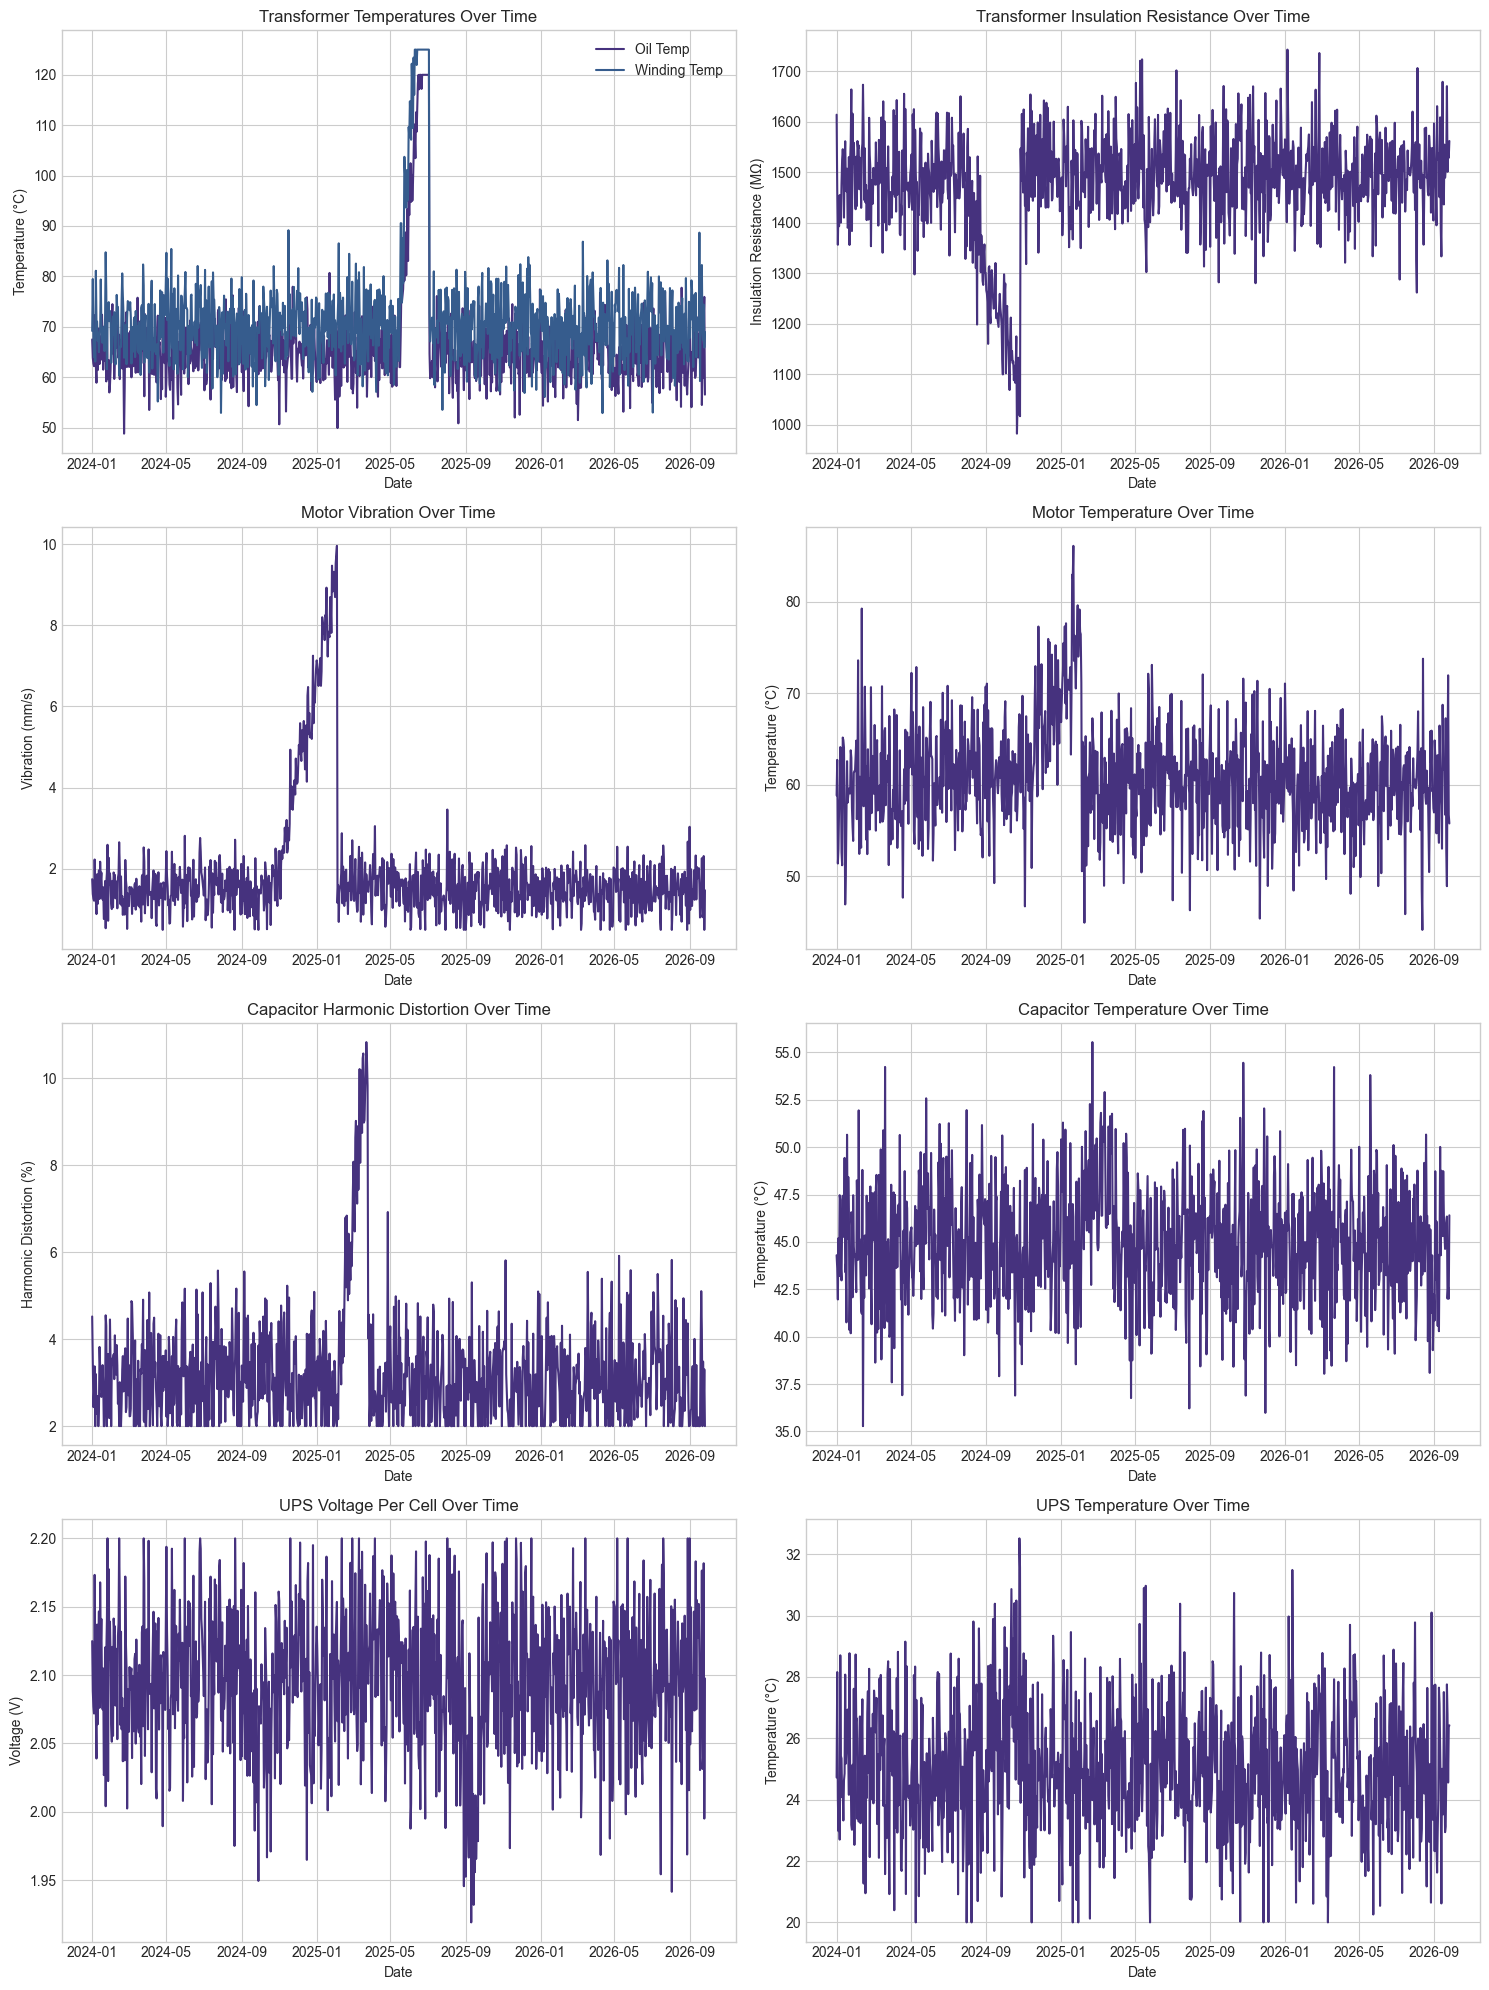

In [7]:
# 2. Time Series Analysis
plt.figure(figsize=(15, 20))

# Transformer - Temperatures
plt.subplot(4, 2, 1)
plt.plot(transformer_df['date'], transformer_df['oil_temp_c'], label='Oil Temp')
plt.plot(transformer_df['date'], transformer_df['winding_temp_c'], label='Winding Temp')
plt.title('Transformer Temperatures Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

# Transformer - Insulation
plt.subplot(4, 2, 2)
plt.plot(transformer_df['date'], transformer_df['insulation_resistance_mohm'])
plt.title('Transformer Insulation Resistance Over Time')
plt.xlabel('Date')
plt.ylabel('Insulation Resistance (MΩ)')

# Motor - Vibration
plt.subplot(4, 2, 3)
plt.plot(motor_df['date'], motor_df['vibration_mm_s'])
plt.title('Motor Vibration Over Time')
plt.xlabel('Date')
plt.ylabel('Vibration (mm/s)')

# Motor - Temperature
plt.subplot(4, 2, 4)
plt.plot(motor_df['date'], motor_df['temperature_c'])
plt.title('Motor Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Capacitor - Harmonics
plt.subplot(4, 2, 5)
plt.plot(capacitor_df['date'], capacitor_df['harmonic_distortion_percent'])
plt.title('Capacitor Harmonic Distortion Over Time')
plt.xlabel('Date')
plt.ylabel('Harmonic Distortion (%)')

# Capacitor - Temperature
plt.subplot(4, 2, 6)
plt.plot(capacitor_df['date'], capacitor_df['temperature_c'])
plt.title('Capacitor Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# UPS - Voltage
plt.subplot(4, 2, 7)
plt.plot(ups_df['date'], ups_df['voltage_per_cell_v'])
plt.title('UPS Voltage Per Cell Over Time')
plt.xlabel('Date')
plt.ylabel('Voltage (V)')

# UPS - Temperature
plt.subplot(4, 2, 8)
plt.plot(ups_df['date'], ups_df['temperature_c'])
plt.title('UPS Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.tight_layout()
plt.savefig('../results/time_series_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

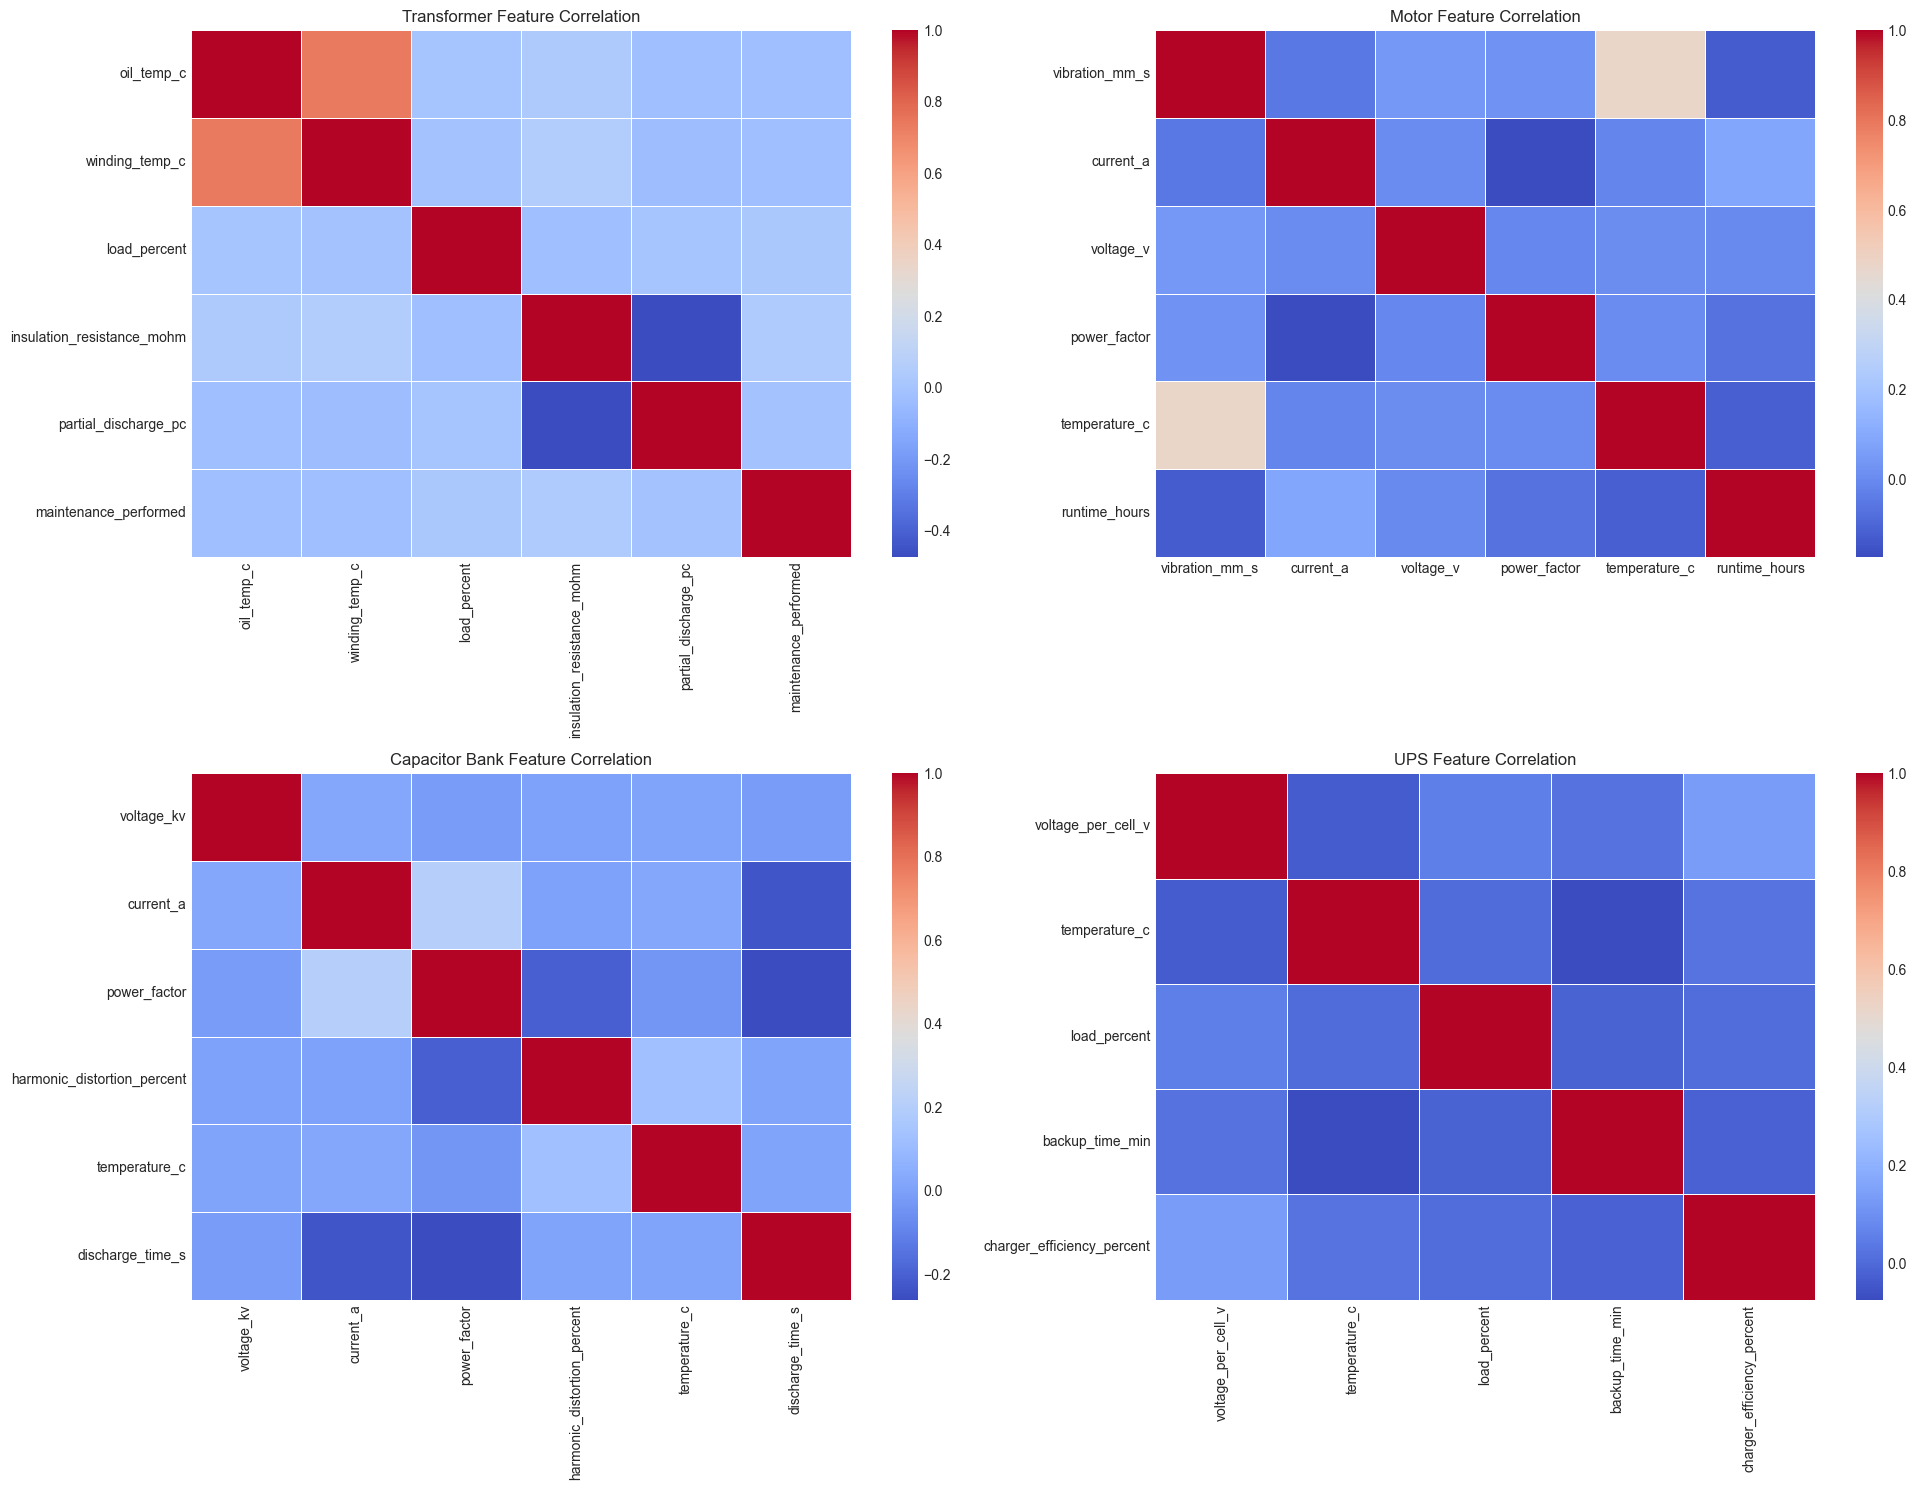

In [8]:
# 3. Correlation Analysis
plt.figure(figsize=(20, 15))

# Transformer
plt.subplot(2, 2, 1)
numeric_cols = transformer_df.select_dtypes(include=[np.number]).columns
corr = transformer_df[numeric_cols].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Transformer Feature Correlation')

# Motor
plt.subplot(2, 2, 2)
numeric_cols = motor_df.select_dtypes(include=[np.number]).columns
corr = motor_df[numeric_cols].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Motor Feature Correlation')

# Capacitor Bank
plt.subplot(2, 2, 3)
numeric_cols = capacitor_df.select_dtypes(include=[np.number]).columns
corr = capacitor_df[numeric_cols].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Capacitor Bank Feature Correlation')

# UPS
plt.subplot(2, 2, 4)
numeric_cols = ups_df.select_dtypes(include=[np.number]).columns
corr = ups_df[numeric_cols].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('UPS Feature Correlation')

plt.tight_layout()
plt.savefig('../results/correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


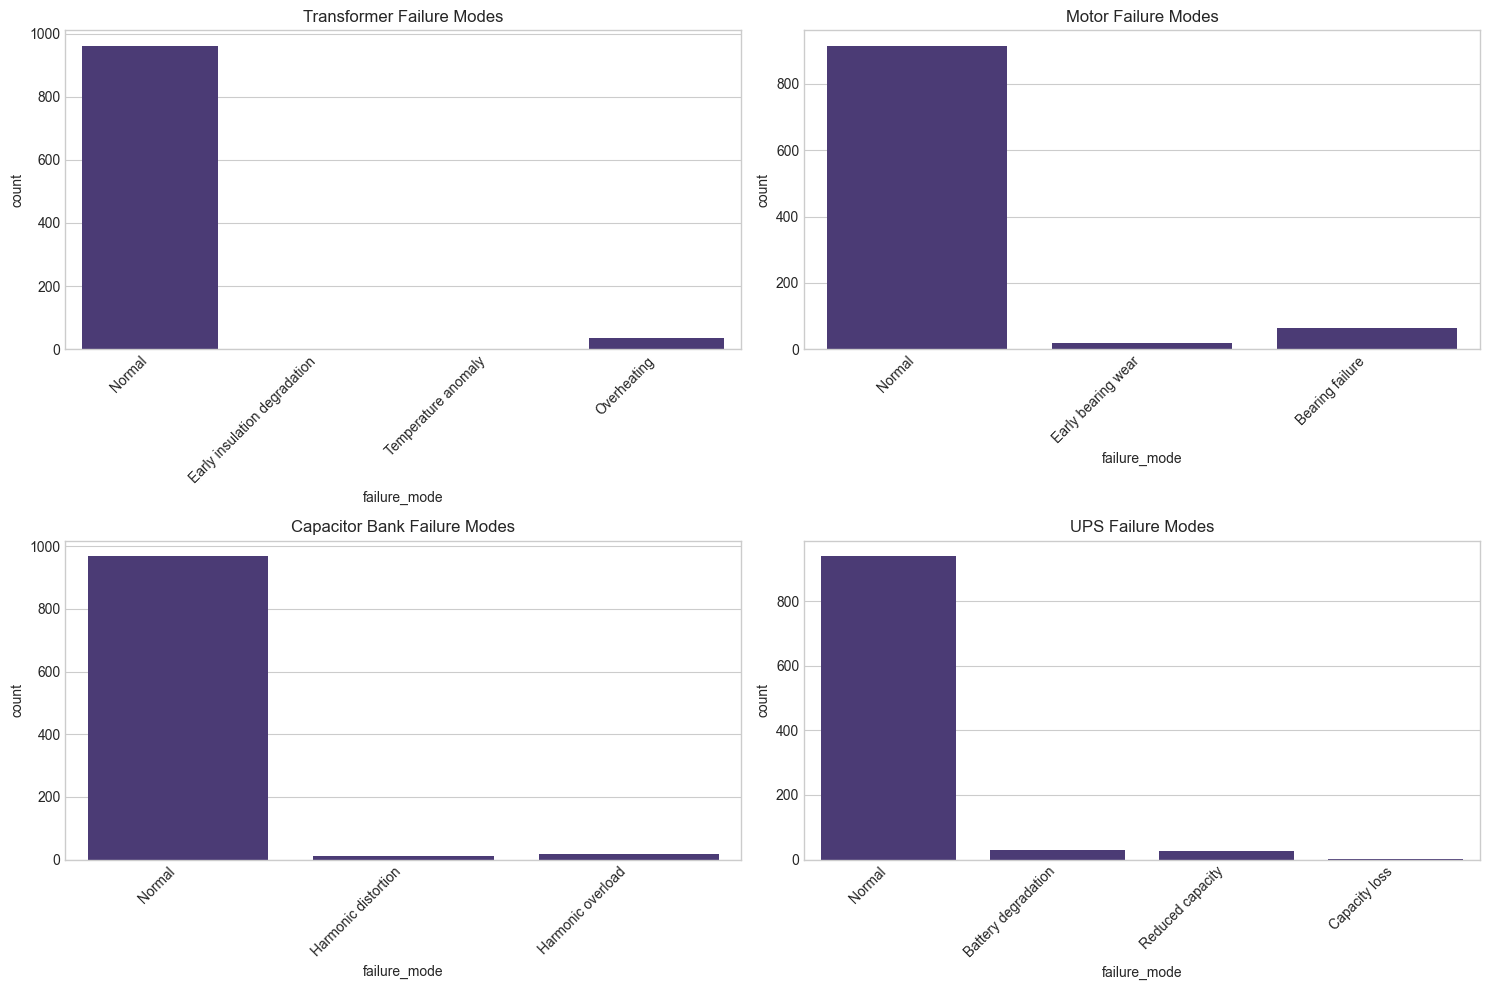

In [9]:
# 4. Failure Mode Analysis
plt.figure(figsize=(15, 10))

# Transformer
plt.subplot(2, 2, 1)
sns.countplot(x='failure_mode', data=transformer_df)
plt.title('Transformer Failure Modes')
plt.xticks(rotation=45, ha='right')

# Motor
plt.subplot(2, 2, 2)
sns.countplot(x='failure_mode', data=motor_df)
plt.title('Motor Failure Modes')
plt.xticks(rotation=45, ha='right')

# Capacitor Bank
plt.subplot(2, 2, 3)
sns.countplot(x='failure_mode', data=capacitor_df)
plt.title('Capacitor Bank Failure Modes')
plt.xticks(rotation=45, ha='right')

# UPS
plt.subplot(2, 2, 4)
sns.countplot(x='failure_mode', data=ups_df)
plt.title('UPS Failure Modes')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('../results/failure_mode_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


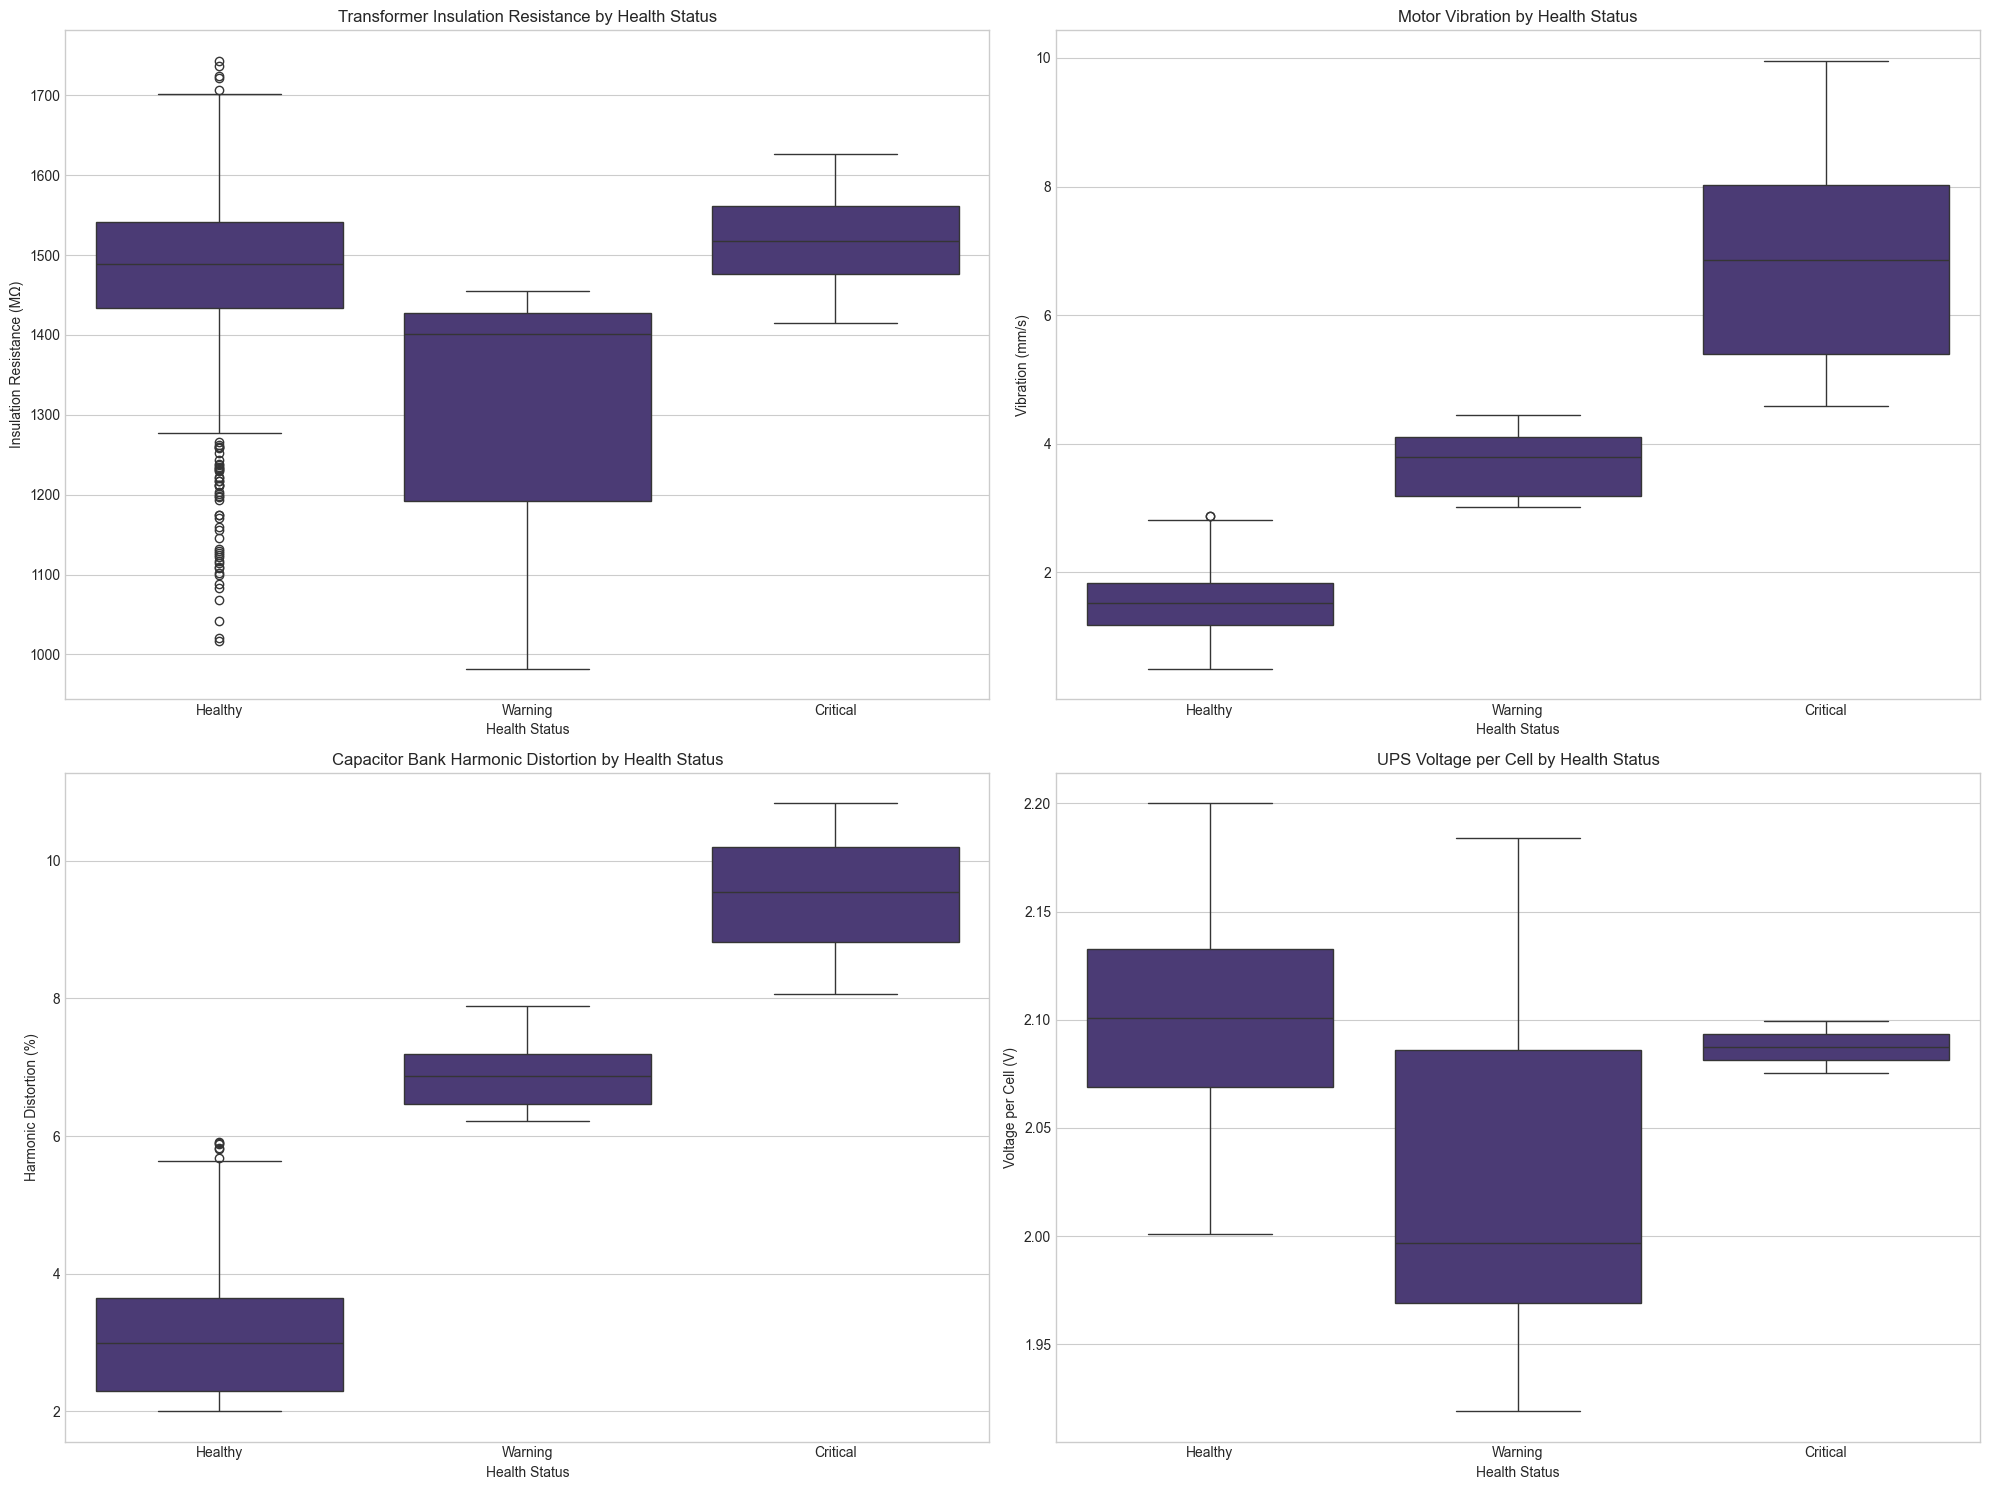

In [10]:
# 5. Critical Parameter Analysis by Health Status
plt.figure(figsize=(20, 15))

# Transformer - Insulation Resistance by Health Status
plt.subplot(2, 2, 1)
sns.boxplot(x='health_status', y='insulation_resistance_mohm', data=transformer_df)
plt.title('Transformer Insulation Resistance by Health Status')
plt.xlabel('Health Status')
plt.ylabel('Insulation Resistance (MΩ)')

# Motor - Vibration by Health Status
plt.subplot(2, 2, 2)
sns.boxplot(x='health_status', y='vibration_mm_s', data=motor_df)
plt.title('Motor Vibration by Health Status')
plt.xlabel('Health Status')
plt.ylabel('Vibration (mm/s)')

# Capacitor Bank - Harmonic Distortion by Health Status
plt.subplot(2, 2, 3)
sns.boxplot(x='health_status', y='harmonic_distortion_percent', data=capacitor_df)
plt.title('Capacitor Bank Harmonic Distortion by Health Status')
plt.xlabel('Health Status')
plt.ylabel('Harmonic Distortion (%)')

# UPS - Voltage per Cell by Health Status
plt.subplot(2, 2, 4)
sns.boxplot(x='health_status', y='voltage_per_cell_v', data=ups_df)
plt.title('UPS Voltage per Cell by Health Status')
plt.xlabel('Health Status')
plt.ylabel('Voltage per Cell (V)')

plt.tight_layout()
plt.savefig('../results/critical_parameters_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

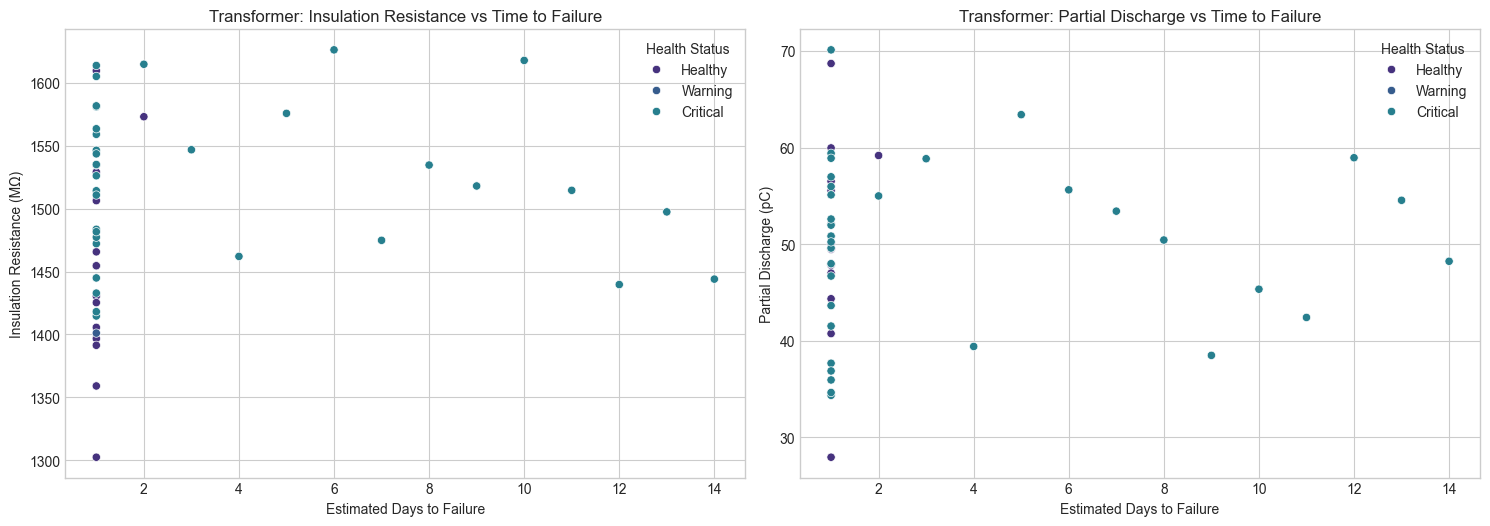

In [11]:
# 6. Time to Failure Analysis
# For demonstration, we'll create a simplified analysis

# Function to estimate time to failure based on health status
def estimate_time_to_failure(df):
    df = df.copy()
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values('date')
    
    # Create a time to failure column (simplified for demonstration)
    df['time_to_failure'] = np.nan
    
    # Find indices where health status changes to Critical
    critical_indices = df[df['health_status'] == 'Critical'].index
    
    for idx in critical_indices:
        # Set time to failure for previous records
        start_idx = max(0, idx - 14)  # Look back 14 days
        time_remaining = 14
        for i in range(idx-1, start_idx-1, -1):
            if i < 0:
                break
            df.loc[i, 'time_to_failure'] = time_remaining
            time_remaining -= 1
    
    return df

# Apply to transformer data
transformer_ttf = estimate_time_to_failure(transformer_df)

# Plot time to failure vs critical parameters
plt.figure(figsize=(15, 10))

# Insulation Resistance vs Time to Failure
plt.subplot(2, 2, 1)
valid_data = transformer_ttf[~transformer_ttf['time_to_failure'].isna()]
sns.scatterplot(x='time_to_failure', y='insulation_resistance_mohm', 
                hue='health_status', data=valid_data)
plt.title('Transformer: Insulation Resistance vs Time to Failure')
plt.xlabel('Estimated Days to Failure')
plt.ylabel('Insulation Resistance (MΩ)')
plt.legend(title='Health Status')

# Partial Discharge vs Time to Failure
plt.subplot(2, 2, 2)
sns.scatterplot(x='time_to_failure', y='partial_discharge_pc', 
                hue='health_status', data=valid_data)
plt.title('Transformer: Partial Discharge vs Time to Failure')
plt.xlabel('Estimated Days to Failure')
plt.ylabel('Partial Discharge (pC)')
plt.legend(title='Health Status')

plt.tight_layout()
plt.savefig('../results/time_to_failure_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
# 7. Summary Statistics by Health Status
# Replace the "7. Summary Statistics by Health Status" cell with the code below.

from IPython.display import display, HTML
import os

def summarize_by_health(df, asset_name,
                        numeric_whitelist=None,
                        per_status_sample_n=500,
                        save_full_describe_html=True,
                        save_per_status_csvs=True,
                        show_html_in_notebook=True,
                        preview_chars=1200):
    """
    Produce readable summaries by health_status, save artifacts, and optionally display an
    expandable HTML of the full groupby.describe().

    - numeric_whitelist: list of numeric column names to limit the summary (None = auto-detect)
    - per_status_sample_n: max rows to save per-status sample CSV (random sample if larger)
    - save_full_describe_html: save the full grouped describe as an HTML file (expandable)
    - save_per_status_csvs: save one CSV per health_status with up to per_status_sample_n rows
    - show_html_in_notebook: display expandable HTML inside the notebook for quick inspection
    - preview_chars: number of characters printed to notebook for a short preview
    """
    os.makedirs('../results', exist_ok=True)
    asset_key = asset_name.lower().replace(' ', '_')

    # Select numeric columns (optionally restrict to whitelist)
    all_numeric = df.select_dtypes(include=[np.number]).columns.tolist()
    if numeric_whitelist is not None:
        numeric = [c for c in numeric_whitelist if c in all_numeric]
    else:
        numeric = all_numeric

    total = len(df)
    counts = df['health_status'].value_counts()
    lines = []
    lines.append(f"{asset_name} summary (rows={total})")
    lines.append("Class distribution:")
    for status, cnt in counts.items():
        lines.append(f"  {status}: {cnt} ({cnt/total*100:.2f}%)")
    lines.append("")

    # Per-status compact summaries + representative rows
    for status in counts.index:
        sub = df[df['health_status'] == status]
        lines.append(f"--- {status} (n={len(sub)}) ---")

        # date range if available
        if 'date' in df.columns:
            try:
                dr_min = sub['date'].min()
                dr_max = sub['date'].max()
                lines.append(f"Date range: {dr_min} -> {dr_max}")
            except Exception:
                pass

        # compact numeric describe
        if numeric:
            desc = sub[numeric].describe().T[['count','mean','std','min','25%','50%','75%','max']]
            lines.append(desc.to_string())
        else:
            lines.append("No numeric columns to summarize.")

        # representative "worst" rows (top 3 by simple deviation)
        if numeric:
            score = sub[numeric].sub(sub[numeric].mean()).abs().sum(axis=1)
            worst = sub.assign(_dev_score=score).sort_values('_dev_score', ascending=False).head(3)
            cols_to_show = ['date','health_status'] + numeric[:8]
            cols_to_show = [c for c in cols_to_show if c in worst.columns]
            if not cols_to_show:
                cols_to_show = worst.columns.tolist()[:8]
            lines.append("Representative most-abnormal rows (top 3):")
            lines.append(worst[cols_to_show].to_string(index=False))
        lines.append("")

        # save per-status sample CSV (full or sampled)
        if save_per_status_csvs:
            sample_n = min(len(sub), per_status_sample_n)
            if sample_n == len(sub):
                save_df = sub.copy()
            else:
                save_df = sub.sample(sample_n, random_state=42)
            safe_status = str(status).lower().replace(' ', '_')
            csv_fname = f"../results/{asset_key}_{safe_status}_sample.csv"
            try:
                save_df.to_csv(csv_fname, index=False)
            except Exception:
                # fallback to smaller save if there are serialization issues
                save_df.head(100).to_csv(csv_fname, index=False)

    # write full text summary
    text_fname = f"../results/{asset_key}_summary_by_health.txt"
    with open(text_fname, 'w', encoding='utf-8') as f:
        f.write("\n".join(lines))

    # save grouped describe CSV for numeric columns (machine readable)
    if numeric:
        csv_fname = f"../results/{asset_key}_numeric_describe_by_health.csv"
        grp = df.groupby('health_status')[numeric].describe()
        grp.to_csv(csv_fname)

    # full grouped describe HTML (expandable) for notebook & inspection
    if save_full_describe_html and numeric:
        try:
            describe_df = df.groupby('health_status')[numeric].describe()
            html_table = describe_df.to_html(classes="table table-striped", border=0)
            expandable = f"<details><summary><b>Show full grouped describe for {asset_name}</b></summary>{html_table}</details>"
            html_fname = f"../results/{asset_key}_grouped_describe.html"
            with open(html_fname, 'w', encoding='utf-8') as fh:
                fh.write(f"<html><head><meta charset='utf-8'></head><body>{expandable}</body></html>")
            if show_html_in_notebook:
                display(HTML(expandable))
        except Exception:
            pass

    # notebook preview + printed paths
    preview = "\n".join(lines)[:preview_chars]
    print(preview)
    print(f"\nFull text saved: {text_fname}")
    if numeric:
        print(f"Numeric describe CSV saved: {csv_fname}")
    if save_full_describe_html and numeric:
        print(f"Full grouped describe HTML saved: {html_fname}")
    if save_per_status_csvs:
        print(f"Per-status sample CSVs saved (up to {per_status_sample_n} rows each) in ../results/")

# Run summaries for all assets with defaults
summarize_by_health(transformer_df, "Transformer")
summarize_by_health(motor_df, "Motor")
summarize_by_health(capacitor_df, "Capacitor_Bank")
summarize_by_health(ups_df, "UPS")

print("\nData exploration completed! Check the 'results' directory for the detailed summaries and CSVs.")

Transformer summary (rows=1000)
Class distribution:
  Healthy: 962 (96.20%)
  Critical: 35 (3.50%)

--- Healthy (n=962) ---
Date range: 2024-01-01 00:00:00 -> 2026-09-26 00:00:00
                            count         mean         std          min          25%          50%          75%          max
oil_temp_c                  962.0    64.985730    5.022362    48.793663    61.750813    64.759942    68.318493    83.051667
winding_temp_c              962.0    70.195634    6.283024    52.872240    65.946546    70.293467    74.092072   103.724759
load_percent                962.0    75.287181    9.955983    44.923677    69.006118    75.591013    81.773419   100.000000
insulation_resistance_mohm  962.0  1476.117308  105.077751  1016.705543  1433.319135  1488.835461  1541.361233  1743.231973
partial_discharge_pc        962.0    52.802649   13.438624    20.000000    44.359542    51.520564    59.575555   119.516831
maintenance_performed       962.0     0.023909    0.152844     0.000000     0

Motor summary (rows=1000)
Class distribution:
  Healthy: 916 (91.60%)
  Critical: 64 (6.40%)

--- Healthy (n=916) ---
Date range: 2024-01-01 00:00:00 -> 2026-09-26 00:00:00
                count         mean          std         min          25%          50%           75%           max
vibration_mm_s  916.0     1.514436     0.492115    0.500000     1.186022     1.528967      1.839115      2.880285
current_a       916.0   101.645435    13.209020   70.786495    93.233146   100.238989    107.968445    150.000000
voltage_v       916.0   414.996433     5.054914  398.793663   411.474124   415.137374    418.195838    430.760284
power_factor    916.0     0.847145     0.049495    0.659370     0.814713     0.849753      0.881478      0.950000
temperature_c   916.0    60.099792     4.958260   44.116481    56.888995    59.887601     63.436374     79.263657
runtime_hours   916.0  8343.947598  4857.527292   16.000000  3747.000000  8795.000000  12544.500000  16273.000000
Representative most-abnormal 

Capacitor_Bank summary (rows=1000)
Class distribution:
  Healthy: 969 (96.90%)
  Critical: 19 (1.90%)

--- Healthy (n=969) ---
Date range: 2024-01-01 00:00:00 -> 2026-09-26 00:00:00
                             count       mean       std        min        25%        50%        75%        max
voltage_kv                   969.0  11.004277  0.464696  10.000000  10.687219  10.998199  11.329766  12.000000
current_a                    969.0  49.604430  5.352009  30.000000  46.306513  49.824962  53.374097  60.000000
power_factor                 969.0   0.947519  0.023086   0.797504   0.935339   0.949879   0.962270   0.980000
harmonic_distortion_percent  969.0   3.094878  0.903780   2.000000   2.292089   2.996626   3.638677   5.918174
temperature_c                969.0  44.873956  3.012747  35.276198  42.872937  44.900619  46.912817  55.547283
discharge_time_s             969.0  10.059916  0.559691   8.575729   9.711040  10.034036  10.375967  12.680058
Representative most-abnormal rows (top 3)

UPS summary (rows=1000)
Class distribution:
  Healthy: 940 (94.00%)
  Critical: 2 (0.20%)

--- Healthy (n=940) ---
Date range: 2024-01-01 00:00:00 -> 2026-09-26 00:00:00
                            count       mean        std        min        25%        50%        75%        max
voltage_per_cell_v          940.0   2.100449   0.046564   2.001035   2.068720   2.100830   2.132586   2.200000
temperature_c               940.0  24.985574   2.060223  20.000000  23.557767  24.936102  26.309550  32.516399
load_percent                940.0  60.170898  10.092419  27.587327  53.216851  60.394285  66.532229  91.520567
backup_time_min             940.0  30.154801   4.449929  20.244491  26.932060  30.387417  33.337311  40.000000
charger_efficiency_percent  940.0  91.997177   1.045542  86.630184  91.353841  91.968751  92.690822  95.000000
Representative most-abnormal rows (top 3):
      date health_status  voltage_per_cell_v  temperature_c  load_percent  backup_time_min  charger_efficiency_percent
20